In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph() 

In [74]:
# DEFINE parameters
num_inputs = 10
neurons_hid1 = 5
neurons_hid2 = 3
neurons_hid3 = 2
neurons_hid4 = 1

learning_rate = 0.00000000003

In [75]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [76]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [77]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [78]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(np.load('./save/weights/lw1.npy'))
w1_ = tie_weight(w1)

w2 = tf.Variable(np.load('./save/weights/lw2.npy'))
w2_ = tie_weight(w2)

w3 = tf.Variable(np.load('./save/weights/lw3.npy'))
w3_ = tie_weight(w3)

w4 = tf.Variable(initializer([neurons_hid3, neurons_hid4]), dtype=tf.float32)
w4_ = tie_weight(w4)

In [79]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
act_func = lambda X:X #tf.nn.relu

In [80]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
hid_layer2 = act_func(tf.matmul(hid_layer1, w2))
hid_layer3 = act_func(tf.matmul(hid_layer2, w3))

hid_layer4 = act_func(tf.matmul(hid_layer3, w4))

hid_layer3_= act_func(tf.matmul(hid_layer4, w4_))

hid_layer2_= act_func(tf.matmul(hid_layer3_, w3_))
hid_layer1_= act_func(tf.matmul(hid_layer2_, w2_))
output_layer = tf.nn.softmax(tf.matmul(hid_layer1_, w1_))

In [81]:
# LOSS FUNCTIONS
# loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=X,logits=output_layer))

In [82]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w4])

In [83]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [85]:
num_epochs = 100
batch_size = 50

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: y_batch})

            training_loss = loss.eval(feed_dict={X: y_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/label_ae_4.ckpt")
            
            
            
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 2.2046921253204346
Epoch 1 Complete. Training Loss: 2.1871161460876465
Epoch 2 Complete. Training Loss: 2.2084131240844727
Epoch 3 Complete. Training Loss: 2.121533155441284
Epoch 4 Complete. Training Loss: 2.1426970958709717
Epoch 5 Complete. Training Loss: 2.2063522338867188
Epoch 6 Complete. Training Loss: 2.292144775390625
Epoch 7 Complete. Training Loss: 2.1925995349884033
Epoch 8 Complete. Training Loss: 2.228187322616577
Epoch 9 Complete. Training Loss: 2.208204746246338
Epoch 10 Complete. Training Loss: 2.1962530612945557
Epoch 11 Complete. Training Loss: 2.2579779624938965
Epoch 12 Complete. Training Loss: 2.2062113285064697
Epoch 13 Complete. Training Loss: 2.195648193359375
Epoch 14 Complete. Training Loss: 2.2130160331726074
Epoch 15 Complete. Training Loss: 2.216935634613037
Epoch 16 Complete. Training Loss: 2.2369253635406494
Epoch 17 Complete. Training Loss: 2.211322546005249
Epoch 18 Complete. Training Loss: 2.181579828262329
Epoch 19 Co

In [86]:
num_test_labels = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/label_ae_4.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer4],
                                  feed_dict={X:mnist.test.labels[start_point:num_test_labels+start_point]})
    weight4= w4.eval()
    
    matches = tf.equal(tf.argmax(output_layer, 1), tf.argmax(X,1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print('TRAIN ACCURACY: ')
    print (sess.run(acc, feed_dict={X:mnist.train.labels}))

    print('TEST ACCURACY: ')
    print (sess.run(acc, feed_dict={X:mnist.test.labels}))
    print('\n')

INFO:tensorflow:Restoring parameters from ./save/label_ae_4.ckpt
TRAIN ACCURACY: 
0.21485454
TEST ACCURACY: 
0.2145




In [87]:
compressed.shape

(10, 1)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.1238 0.0033 0.0089 0.3306 0.0036 0.037  0.3076 0.0075 0.1477 0.0299]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.0078 0.339  0.121  0.0028 0.3125 0.0275 0.003  0.1456 0.0065 0.0343]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.     0.7527 0.     0.     0.2473 0.     0.     0.     0.     0.    ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.     0.     0.     0.8295 0.     0.     0.1705 0.     0.     0.    ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.   0.84 0.   0.   0.16 0.   0.   0.   0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.0078 0.339  0.121  0.0028 0.3125 0.0275 0.003  0.1456 0.0065 0.0343]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.     0.     0.     0.8223 0.     0.     0.1777 0.     0.     0.    ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.     0.     0.     0.8223 0.     0.     0.1777 0.     0.     0.    ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.1238 0.0033 0.0089 0.3306 0.0036 0.037  0.3076 0.0075 0.1477 0.0299]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.   0.84 0.   0.   0.16 0.   0.   0.   0.   0.  ]


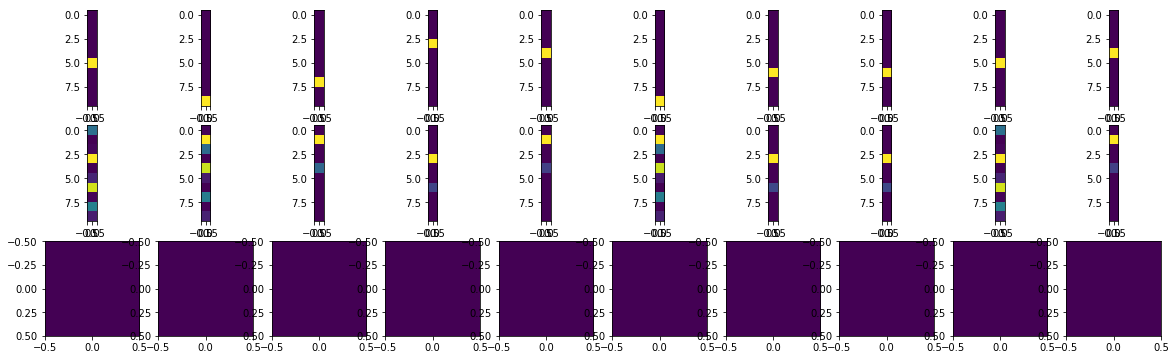

In [92]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(3, num_test_labels, figsize=(20, 6))
for i in range(start_point,num_test_labels+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.labels[i], (10, 1)))
    a[1][j].imshow(np.reshape(results[j], (10, 1)))
    a[2][j].imshow(np.reshape(compressed[j], (1, 1)))
    print(mnist.test.labels[i])
    np.set_printoptions(precision=4, suppress=True)
    print(results[j])

In [89]:
weight4

array([[0.5099],
       [0.8299]], dtype=float32)

In [90]:
print(weight4.shape)
np.save('./save/weights/lw4.npy',weight4)
#wt1 = np.load('./save/weights/w1.npy')

(2, 1)
